In [41]:
import pandas as pd

# Load the dataset (ensure the path is correct)
tweets_df = pd.read_csv('Twitter_Data.csv')

In [42]:
tweets_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [45]:
import re

# Pre-processing function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags (but keep the words)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

tweets_df['clean_text'] = tweets_df['clean_text'].fillna('').apply(clean_text)

In [48]:
from textblob import TextBlob

# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

tweets_df['sentiment'] = tweets_df['clean_text'].apply(analyze_sentiment)

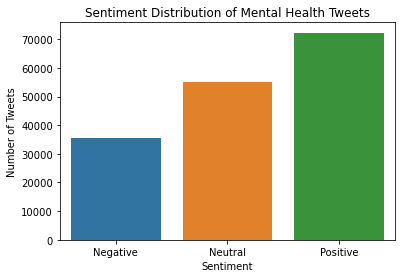

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of sentiment distribution
sns.countplot(x='sentiment', data=tweets_df)
plt.title('Sentiment Distribution of Mental Health Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tweets_df['clean_text']).toarray()
y = tweets_df['sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

    Negative       0.86      0.62      0.72      7180
     Neutral       0.77      0.97      0.86     11031
    Positive       0.90      0.84      0.87     14385

    accuracy                           0.84     32596
   macro avg       0.84      0.81      0.82     32596
weighted avg       0.85      0.84      0.83     32596

Accuracy: 0.8366363971039391


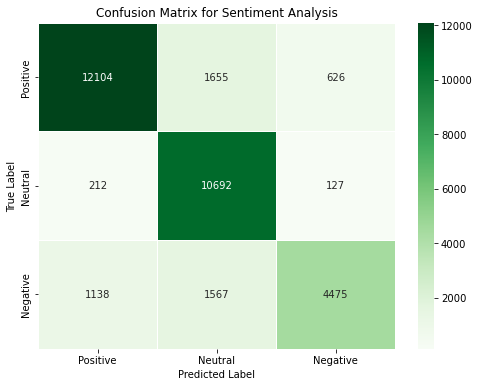

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels from your model
# y_test = true labels
# y_pred = predicted labels from your model

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])

# Convert confusion matrix into DataFrame for better labeling in seaborn heatmap
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Positive", "Neutral", "Negative"], columns=["Positive", "Neutral", "Negative"])

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap="Greens", linewidths=.5)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

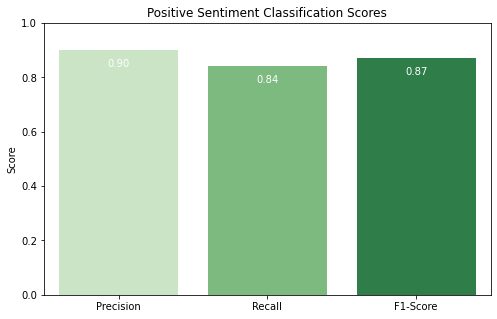

In [53]:
# Data for plotting
categories = ['Precision', 'Recall', 'F1-Score']
positive_scores = [0.90, 0.84, 0.87]  # Replace these with your actual scores

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=positive_scores, palette="Greens")
plt.ylim(0, 1)  # Limit the y-axis to show scores between 0 and 1
plt.title('Positive Sentiment Classification Scores')
plt.ylabel('Score')
for i, score in enumerate(positive_scores):
    plt.text(i, score - 0.05, f'{score:.2f}', va='center', ha='center', color='white')
plt.show()